# CNN

본 문서는 TensorFlow Keras 를 사용하여 CNN 을 구현해 보는 문서입니다.<br>
Convolutional Neural Networks 는 현재 이미지 분석에서 가장 성공적으로 쓰이고 있습니다.<br>

![](http://ufldl.stanford.edu/tutorial/images/Cnn_layer.png)
(출처: http://ufldl.stanford.edu/tutorial/images/Cnn_layer.png)

## Hyper parameter 

In [1]:
batch_size = 128
num_classes = 10
epochs = 15

## 라이브러리 및 함수 설정


In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import optimizers

import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

## Mnist 
Data 가져오기


In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 데이터 세팅

In [4]:
# Scale images to the [0,1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make images have shape (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape

(60000, 28, 28, 1)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_test.shape

(10000, 10)

## CNN 모델 만들기

In [6]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## 모델 훈련

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/15
469/469 [==============================] - 6s 10ms/step - loss: 0.3377 - accuracy: 0.8980 - val_loss: 0.0801 - val_accuracy: 0.9752
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1044 - accuracy: 0.9689 - val_loss: 0.0519 - val_accuracy: 0.9840
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0783 - accuracy: 0.9758 - val_loss: 0.0446 - val_accuracy: 0.9865
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0651 - accuracy: 0.9799 - val_loss: 0.0356 - val_accuracy: 0.9881
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0376 - val_accuracy: 0.9877
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0301 - val_accuracy: 0.9902
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0304 - val_accuracy: 0.9899
Epoch

## 확인하기

## training loss and acc ##


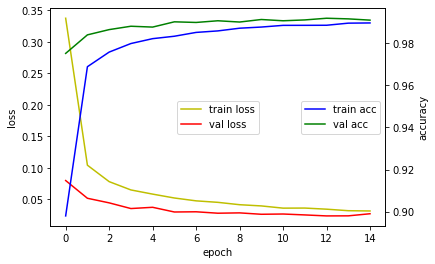

Test loss: 0.027341388165950775
Test accuracy: 0.9909999966621399


In [9]:
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
